Simple Linear Regression

Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
data = pd.read_csv("Salary_Data.csv")
print(data)


    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [3]:
X = data.iloc[:, :-1].values
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [7]:
X_df = pd.DataFrame(X)
X_df.isnull().any(axis=1).any()

False

In [4]:
y = data.iloc[:, -1].values
y

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [8]:
y_df = pd.DataFrame(y)
y_df.isnull().any(axis=1).any()

False

Splitting the Dataset

In [9]:
# training 66.7% / testing 33.3%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3333333333333333333333333, random_state=0)

In [10]:
X_train

array([[ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

In [11]:
X_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ],
       [ 5.3],
       [ 7.9]])

In [12]:
y_train

array([ 56642.,  66029.,  64445.,  61111., 113812.,  91738.,  46205.,
       121872.,  60150.,  39891.,  81363.,  93940.,  57189.,  54445.,
       105582.,  43525.,  39343.,  98273.,  67938.,  56957.])

In [13]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431., 112635.,
        55794.,  83088., 101302.])

Feature Scaling

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)

Simple Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Predicting the Test set result

In [15]:
y_pred = regressor.predict(X_test)
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

Visualizing the training set results

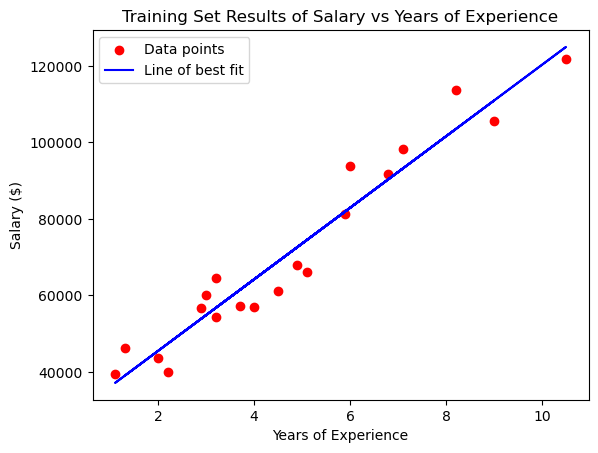

In [19]:
# Create the scatter plot of the data points
plt.scatter(X_train, y_train, color='red', label='Data points')

# Plot the line of best fit
plt.plot(X_train, regressor.predict(X_train), color='blue', label='Line of best fit')

# Add labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Salary ($)')
plt.title('Training Set Results of Salary vs Years of Experience')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Visualizing the test set results

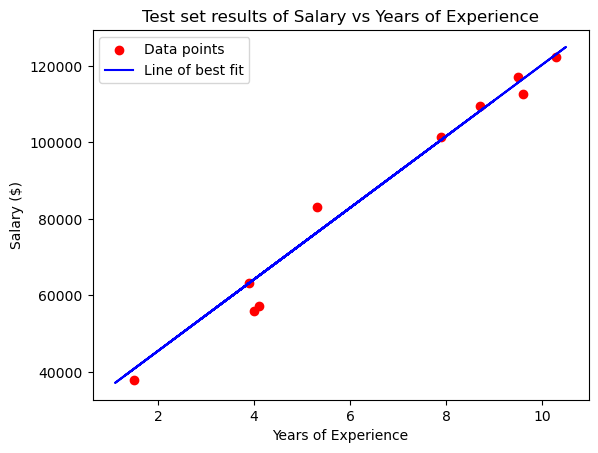

In [20]:
# New data points
# Create the scatter plot of the data points
plt.scatter(X_test, y_test, color='red', label='Data points')

# Plot the line of best fit
plt.plot(X_train, regressor.predict(X_train), color='blue', label='Line of best fit')

# Add labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Salary ($)')
plt.title('Test set results of Salary vs Years of Experience')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Accuracy of the Model

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# For training set
y_train_pred = regressor.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# For test set
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred)

print(f"Training Set - RMSE: {rmse_train}, R²: {r2_train}")
print(f"Test Set - RMSE: {rmse_test}, R²: {r2_test}")

Training Set - RMSE: 6070.662959214961, R²: 0.9381900012894278
Test Set - RMSE: 4585.4157204675885, R²: 0.9749154407708353
